# 第4回レポート

In [1]:
import numpy as np # 数値計算
import matplotlib.pyplot as plt # グラフ描画
import scienceplots # グラフ描画のテーマ

## （１）ノイズがないとき

In [2]:
def stochastic_differential_equation(params: dict, dt: float) -> float:
    """ 確率微分方程式を解く関数
    Args:
        params (dict): パラメータ
        dt (float): 微小時間
    Returns:
        float: 確率微分方程式の解
    """
    a = params["a"] # パラメータ: a
    sigma = params["sigma"] # パラメータ: sigma
    dw = np.random.normal(0, np.sqrt(dt)) # 平均0, 分散dtの正規分布に従う乱数
    return a * dt + sigma * dw


In [3]:
def plot_x(X: list, params: dict, file_name: str, seeds: list=None):
    """ xの値をグラフに描画する関数
    Args:
        X (list): シード値が異なるxの値を格納するリスト
        params (dict): パラメータ
        file_name (str): 画像のファイル名
        seeds (list, optional): 乱数のシードを格納するリスト. Defaults to None.
    """
    plt.style.use(["science", "ieee"]) # グラフ描画のテーマを適用
    plt.figure(figsize=(8, 4)) # グラフのサイズを指定

    if seeds is None or len(seeds) == 1:
        plt.plot(t, X[0], label=f"seed={seeds}", linestyle="solid")
    else:
        for i in range(len(seeds)):
            plt.plot(t, X[i], label=f"seed={seeds[i]}", linestyle="solid")
        plt.legend() # 凡例を表示
    plt.xlabel("time t") # x軸のラベルを設定
    plt.ylabel("x") # y軸のラベルを設定
    plt.title(f"Stochastic Differential Equation\na={params['a']}, sigma={params['sigma']}") # グラフのタイトルを設定
    plt.grid() # グリッド線を表示
    plt.savefig(f"{file_name}.png") # グラフを画像として保存
    plt.show() # グラフを表示

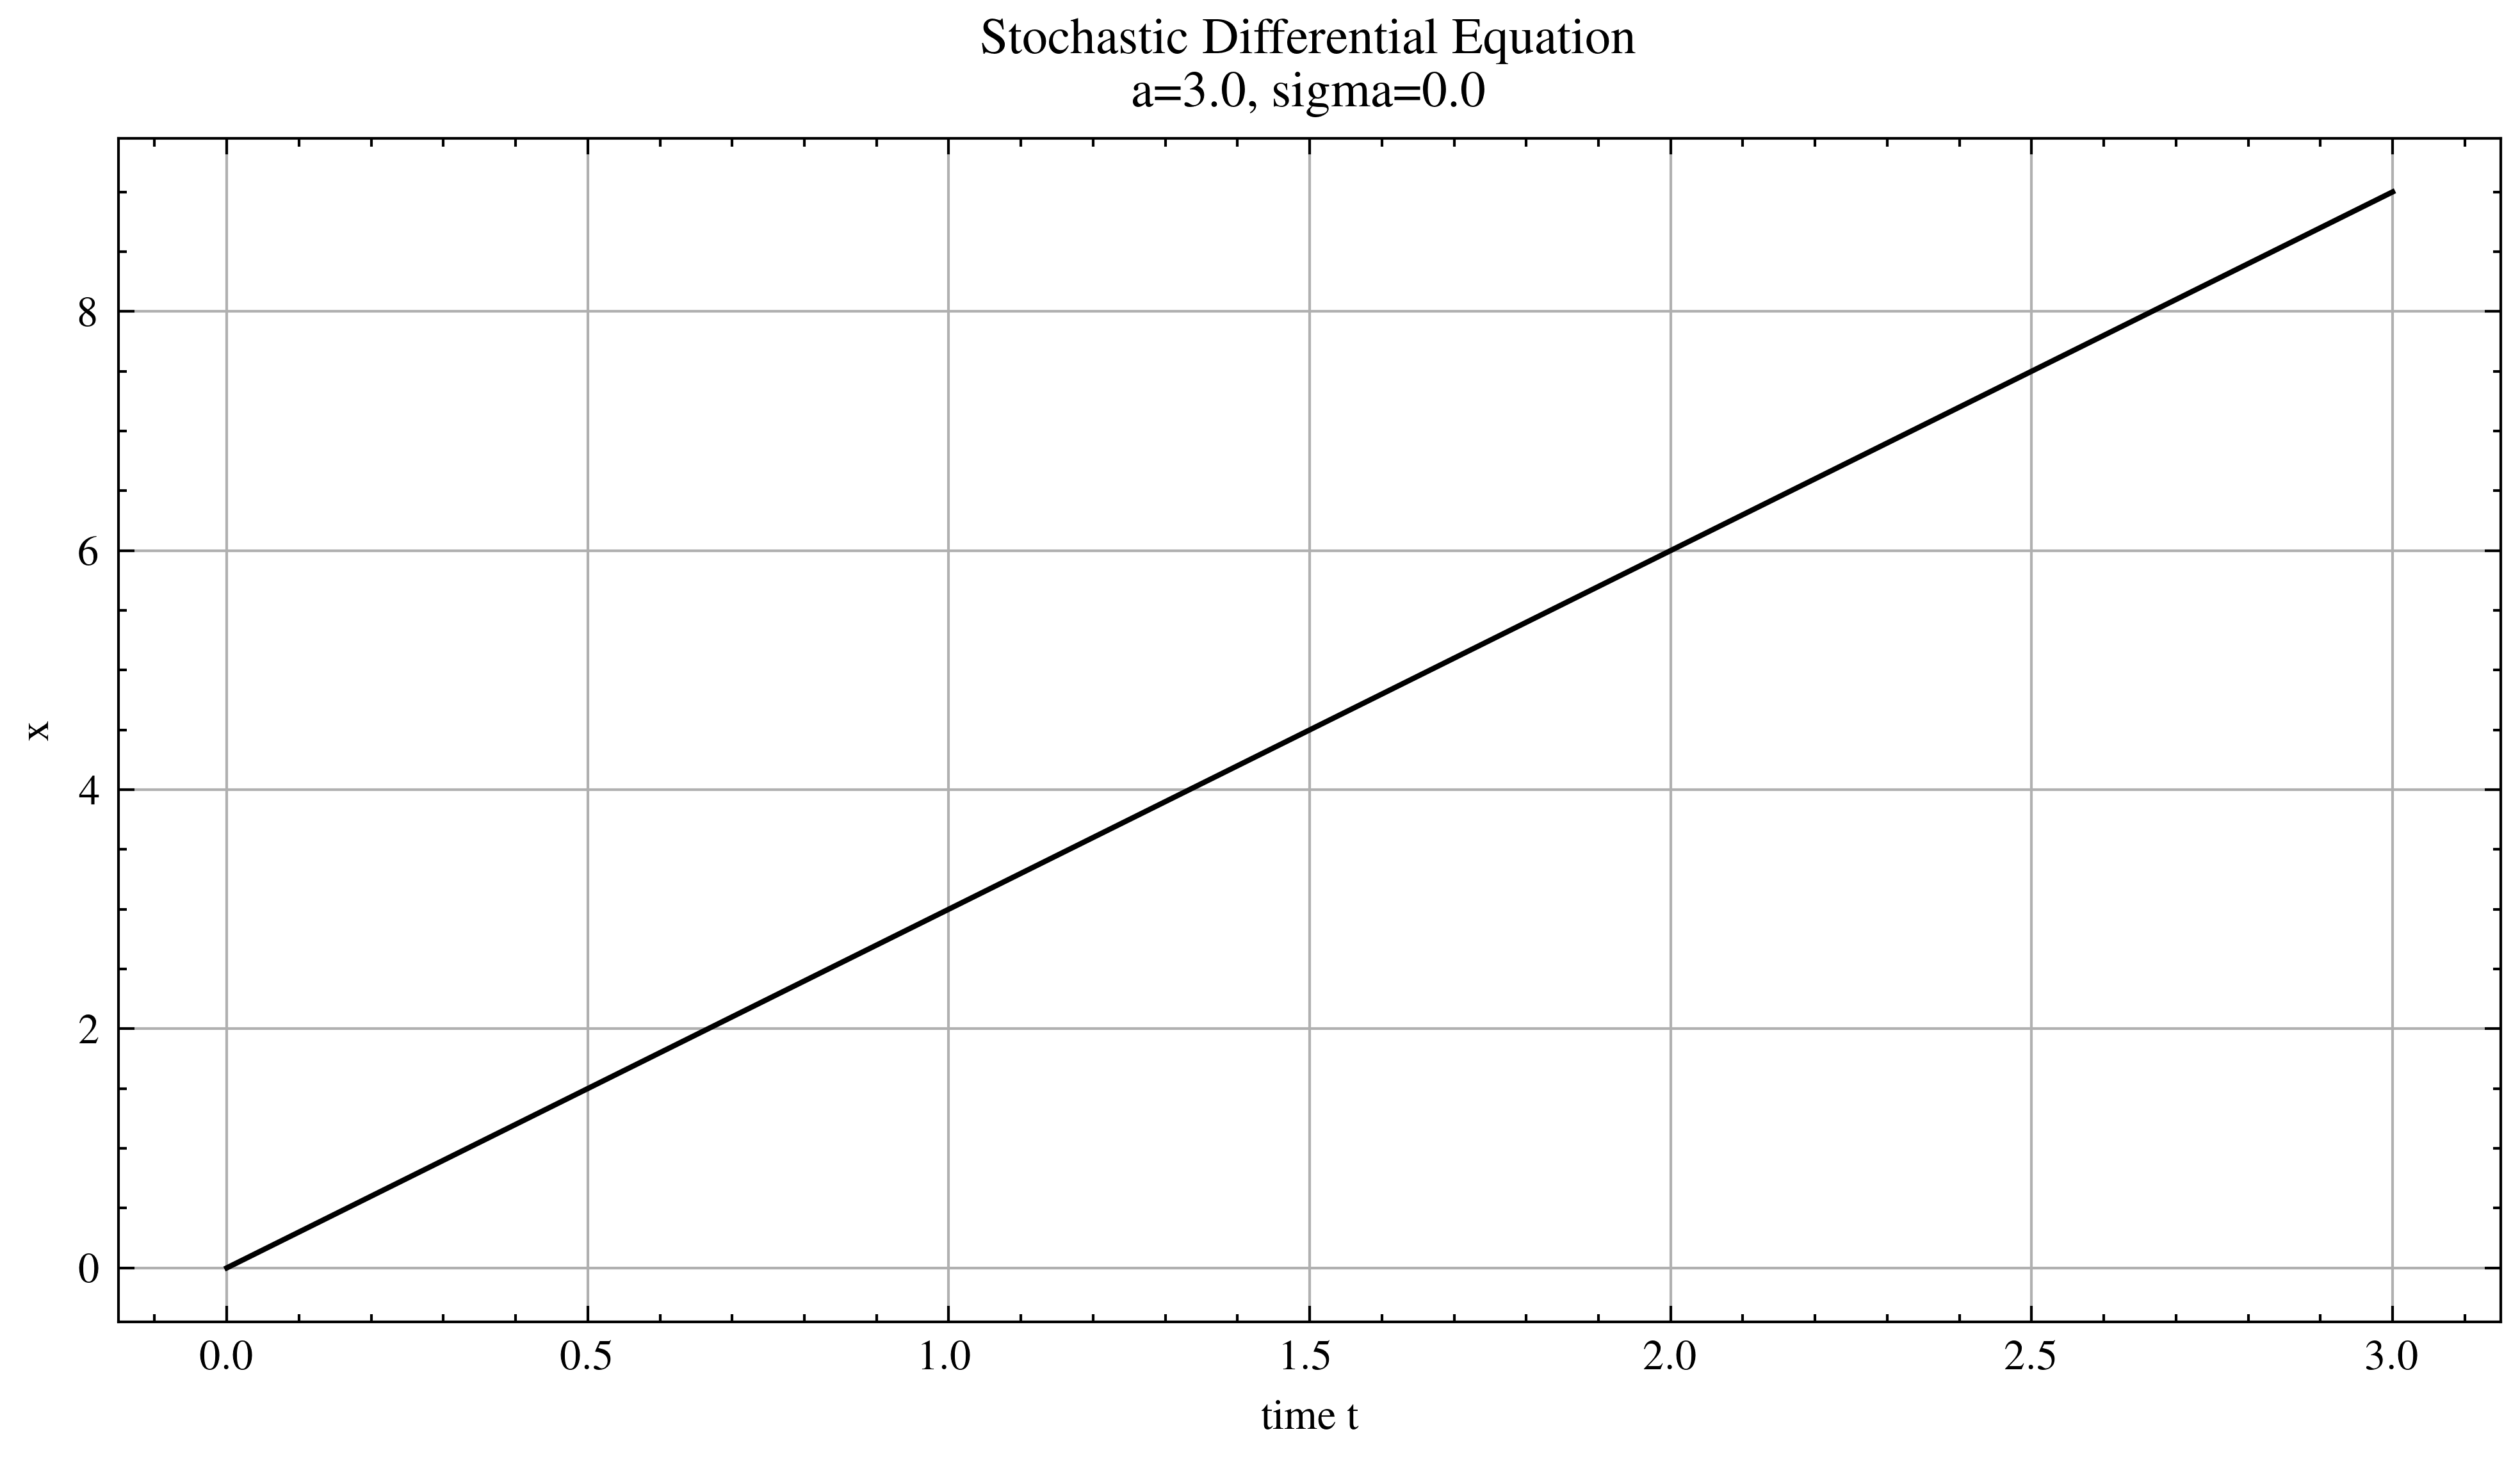

In [4]:
dt = 1e-3 # 時間刻み
t = np.arange(0, 3+dt, dt) # 時間軸:[0, 3]をdt刻みで分割
params = {"a": 3.0, "sigma": 0.0} # パラメータ: a=3.0, sigma=0.0
X = [] # xの値を格納するリスト
seeds = [0] # 乱数のシードを格納するリスト

for seed in seeds:
    np.random.seed(seed) # 乱数のシードを設定
    x = np.zeros(len(t)) # xの初期値を0に設定

    # シミュレーション
    for i in range(len(t)-1):
        x[i+1] = x[i] + stochastic_differential_equation(params, dt)
        
    X.append(x.copy()) # xの値をリストに追加

plot_x(X, params, "stochastic_differential_equation_1") # グラフ描画

## （２）ノイズが小さいとき

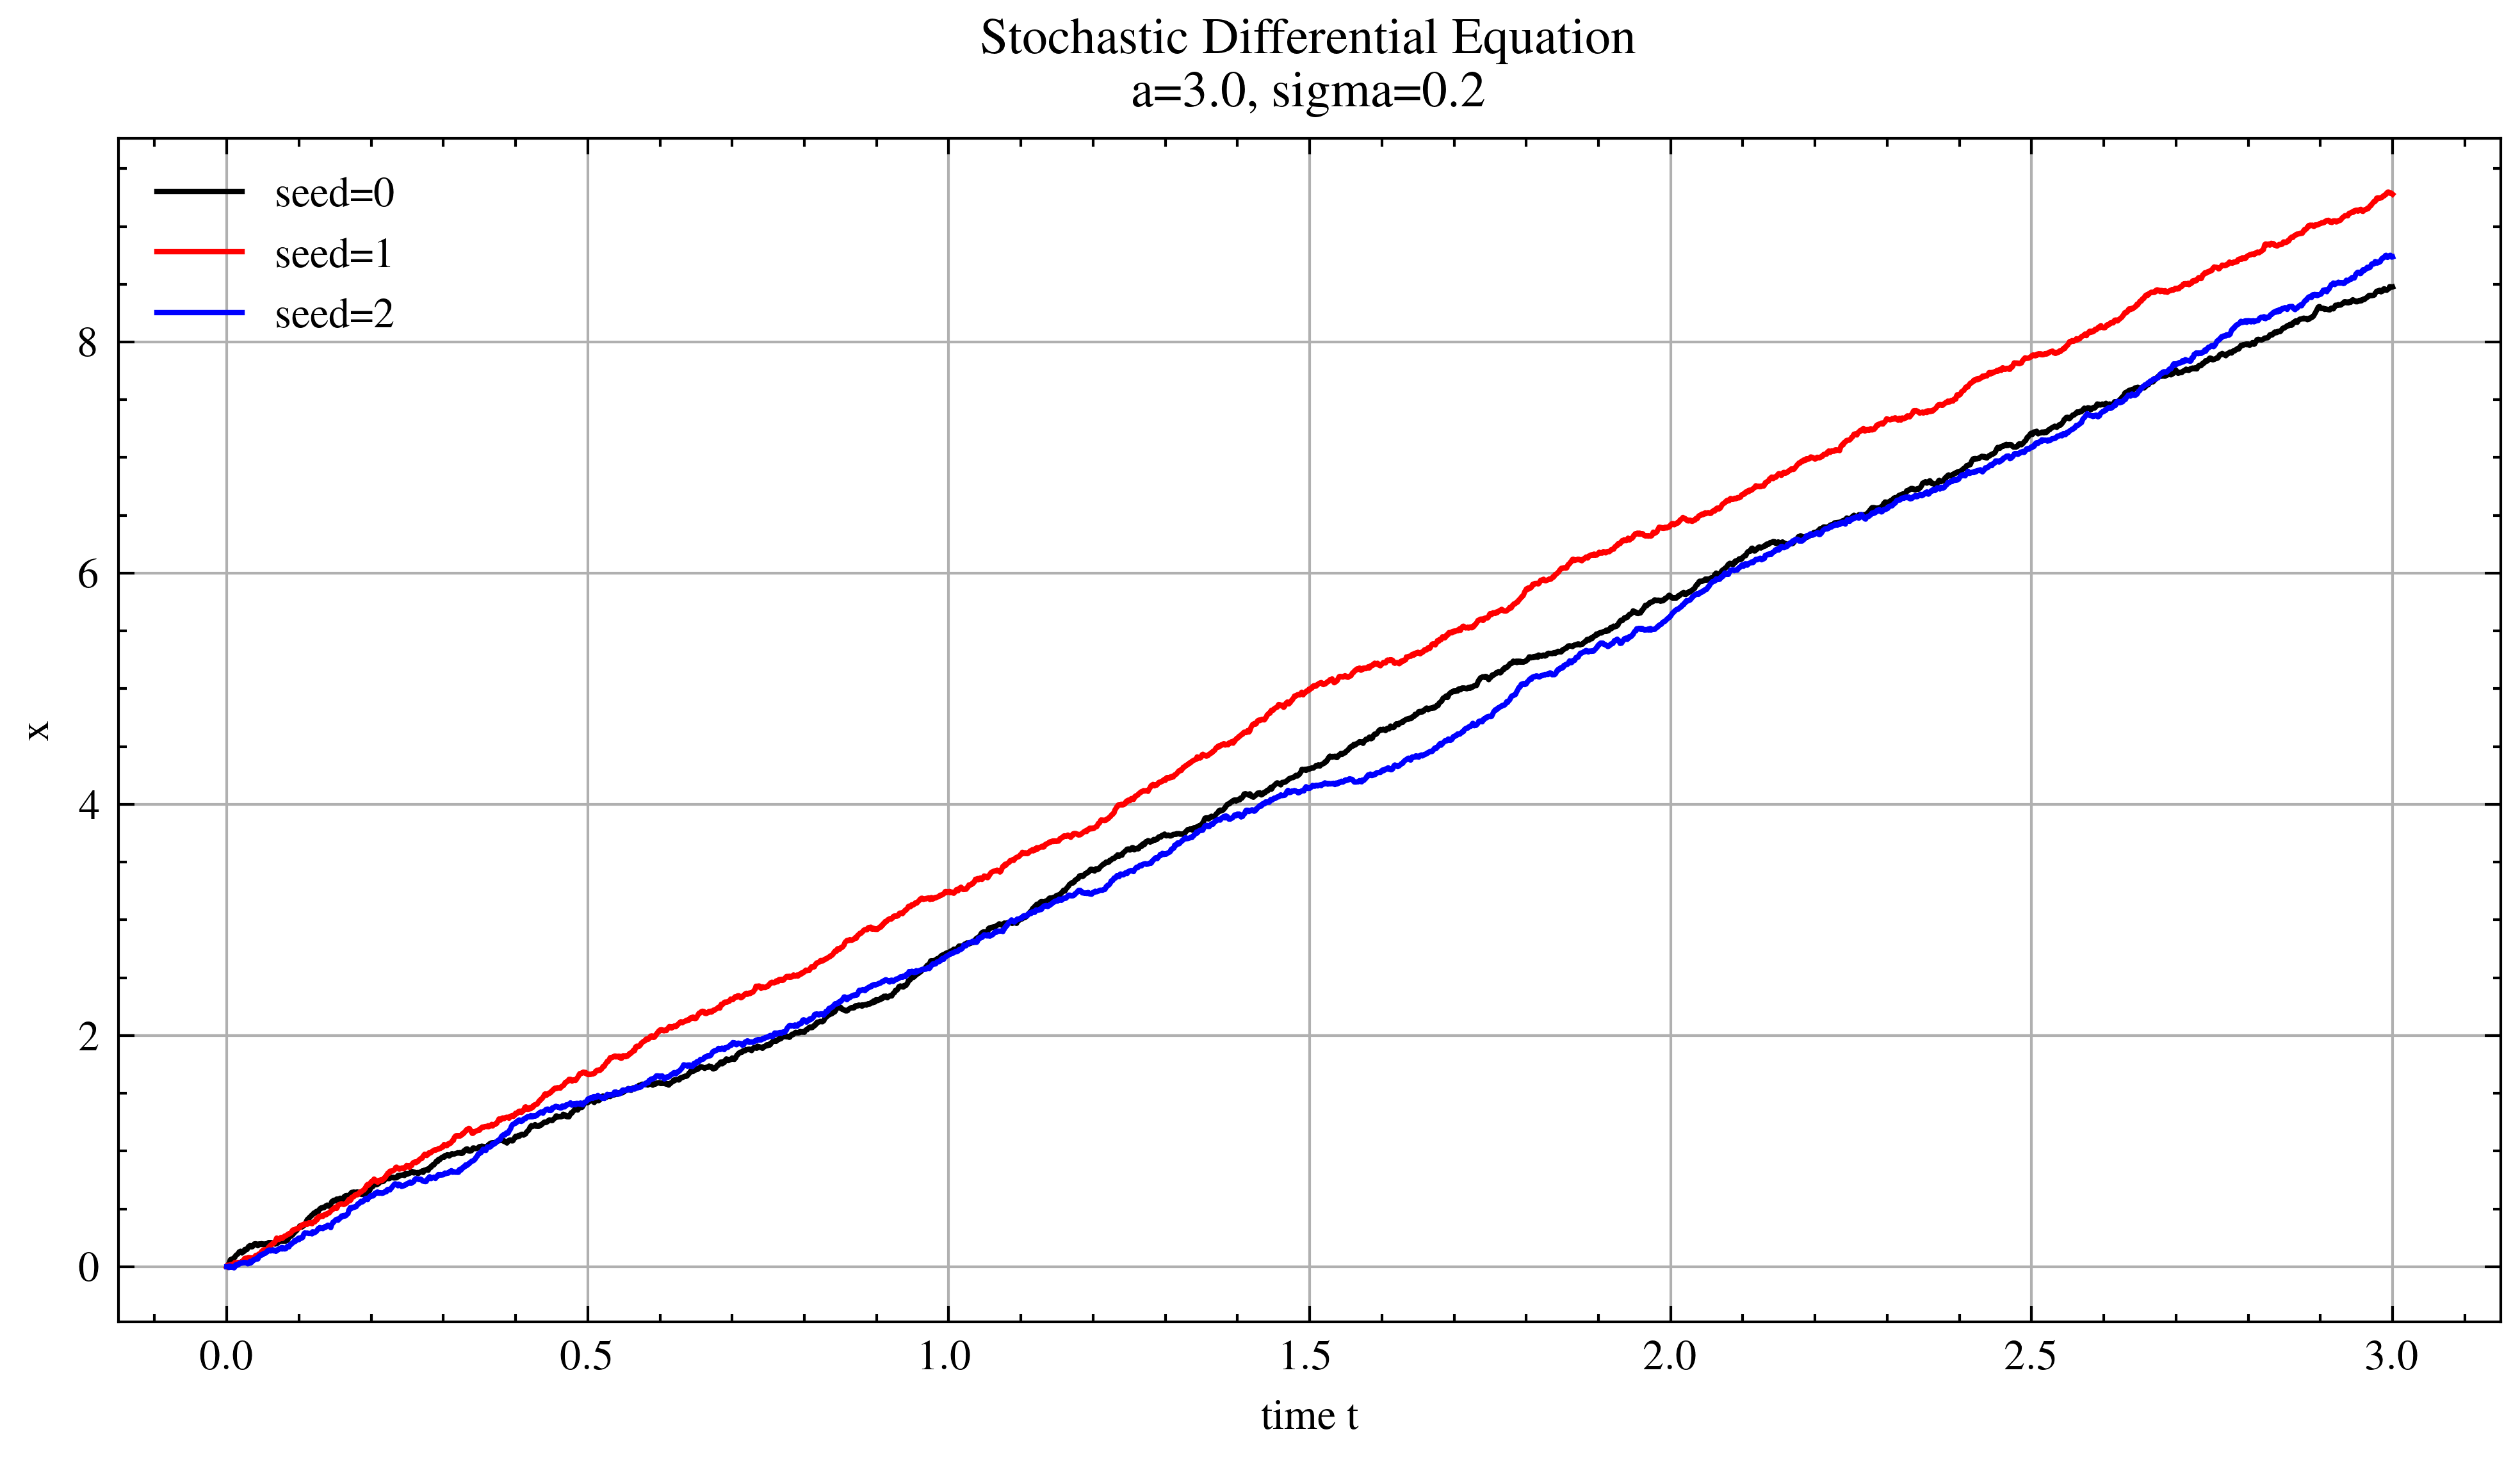

In [5]:
dt = 1e-3 # 時間刻み
X = [] # xの値を格納するリスト
seeds = [i for i in range(3)] # 乱数のシードを格納するリスト
t = np.arange(0, 3+dt, dt) # 時間軸:[0, 3]をdt刻みで分割
params = {"a": 3.0, "sigma": 0.2} # パラメータ: a=3.0, sigma=0.2

for seed in seeds:
    np.random.seed(seed) # 乱数のシードを設定
    x = np.zeros(len(t)) # xの初期値を0に設定

    # オイラー・丸山法
    for i in range(len(t)-1):
        x[i+1] = x[i] + stochastic_differential_equation(params, dt)
        
    X.append(x.copy()) # xの値をリストに追加
plot_x(X, params, "stochastic_differential_equation_2", seeds) # グラフ描画

## （３）ノイズが大きいとき

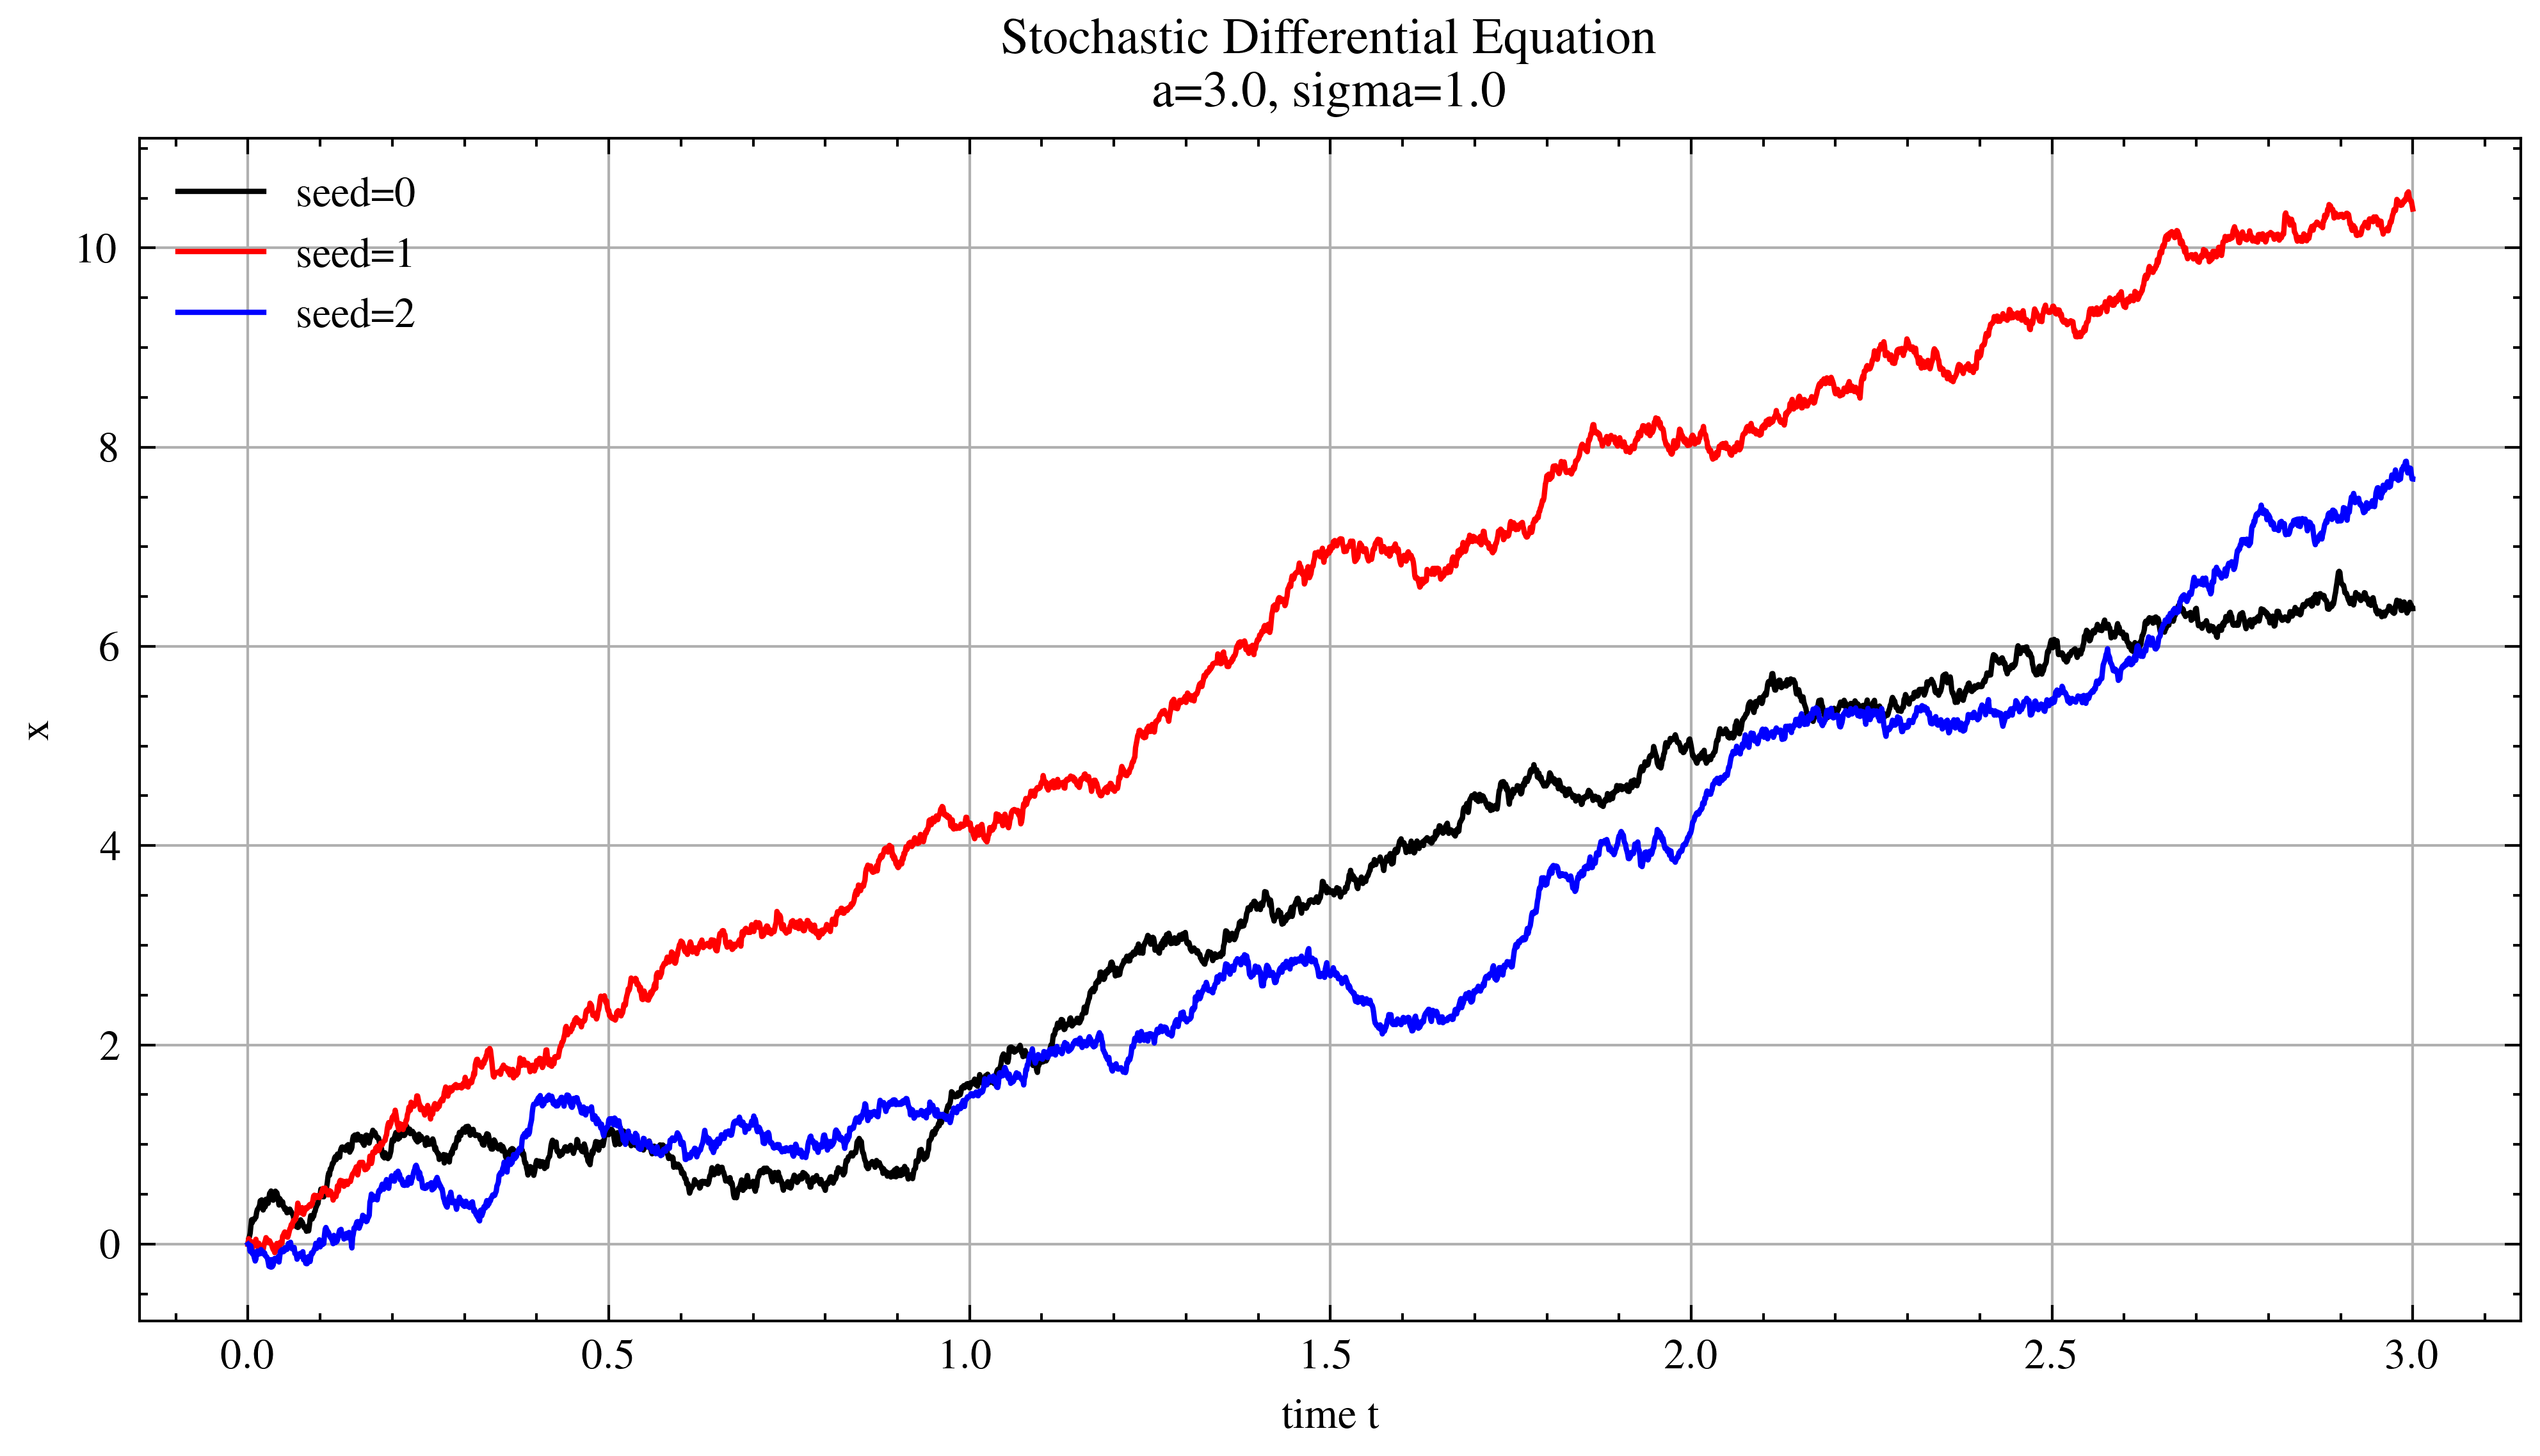

In [6]:
dt = 1e-3 # 時間刻み
X = [] # xの値を格納するリスト
seeds = [i for i in range(3)] # 乱数のシードを格納するリスト
t = np.arange(0, 3+dt, dt) # 時間軸:[0, 3]をdt刻みで分割
params = {"a": 3.0, "sigma": 1.0} # パラメータ: a=3.0, sigma=1.0

for seed in seeds:
    np.random.seed(seed) # 乱数のシードを設定
    x = np.zeros(len(t)) # xの初期値を0に設定

    # オイラー・丸山法
    for i in range(len(t)-1):
        x[i+1] = x[i] + stochastic_differential_equation(params, dt)
        
    X.append(x.copy()) # xの値をリストに追加

plot_x(X, params, "stochastic_differential_equation_3", seeds) # グラフ描画